In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

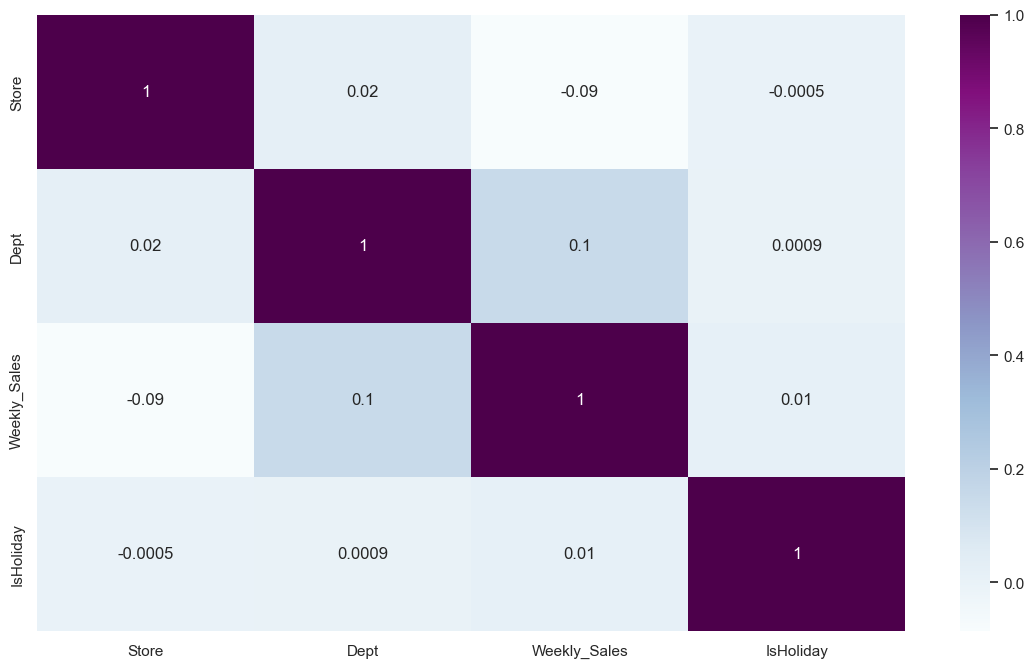

In [16]:
df = pd.read_csv(r"train.csv")
df['IsHoliday'] = df['IsHoliday'].replace("TRUE", 1)
df['IsHoliday'] = df['IsHoliday'].replace("FALSE", 0)
df.drop(inplace=True, columns="Date")
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="BuPu", fmt='.1g')

In [31]:
X = df.drop(columns='IsHoliday')
y = df['IsHoliday']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
y_actual_data = y_test
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
def model_evaluation(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    R2_Score = metrics.r2_score(y_test, y_pred)
    
    return pd.DataFrame([R2_Score], index=['R2-Score'], columns=[model_name])
model_evaluation(linear_reg, X_test_scaled, y_test, 'Linear Reg.')


,Linear Reg.
R2-Score,0.000132
